# Usando GANs

Nesse notebook vamos gerar imagens usando GANs pré-treinadas em alguns datasets mais complexos que o MNIST.

In [ ]:
import torch
import torchvision

import matplotlib.pyplot as plt

use_gpu = True if torch.cuda.is_available() else False

In [ ]:
torch.manual_seed(10)

## Modelo 1: DCGAN

O modelo foi pré-treinado nos dados do dataset [FashionGEN](https://arxiv.org/pdf/1806.08317.pdf). Diferente do MNIST, as imagens possuem 3 canais e uma resolução mais alta. Embora as imagens possuam resolução $(1360, 1360)$ a GAN foi necessariamente treinada para gerar imagens nessa resolução (gerar imagens em alta resolução ainda era um dos desafios até pouco tempo).

In [ ]:
# primeiramente vamos carregar o modelo pré-treinado do Hub do Pytorch (https://pytorch.org/hub/research-models).
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'DCGAN', pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


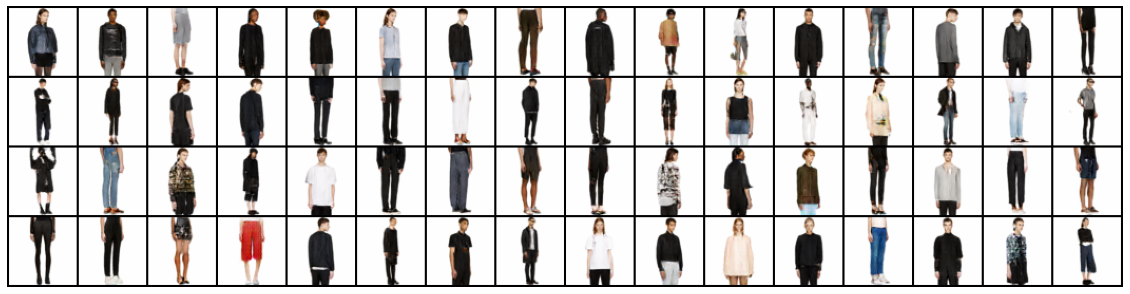

In [ ]:
num_images = 64

# convenientemente, esse modelo já nos fornece um método para gerar o ruído z
# com as dimensões adequadas para esse modelo
noise, _ = model.buildNoiseData(num_images)

# geramos a imagem usando o ruído amostrado
with torch.no_grad():
    generated_images = model.test(noise)

# construindo uma imagem com um "grid" com todas as 64, trocas os canais para a ultima
# dimensão e transfere os dados para a cpu num objeto numpy
grid = torchvision.utils.make_grid(generated_images, nrow=16, scale_each=True, normalize=True).permute(1, 2, 0).cpu().numpy()

# mostrando a imagem
plt.subplots(figsize=(20, 10))
plt.imshow(grid)
plt.axis('off')
plt.show();

Podemos visualizar como é a arquitetura do Gerador:

In [ ]:
model.getNetG()

GNet(
  (formatLayer): ConvTranspose2d(120, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
  (main): Sequential(
    (batchNorm0): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (convTranspose1): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (batchNorm1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu1): ReLU(inplace=True)
    (convTranspose2): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (batchNorm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu2): ReLU(inplace=True)
    (convTranspose3): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (batchNorm3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu3): ReLU(inplace=True)
    (outlayer): ConvTranspo

## Modelo 2: ProGAN (Progressive Growing GAN)

A ProGAN tem esse nome porque ela encara o treinamento como um processo de vários estágios. Em cada estágio, o objetivo da rede é aprender a aumenetar a resolução dos dados gerados em uma escala, ao invés de aprender todo o processo end-to-end de uma vez. Com isso, essa arquitetura trouxe resultados bastante interessantes quando surgiu, chegando a gerar imagens de resolução $(512, 512)$. No caso do modelo que vamos carregar aqui, os dados foram pré-treinados nos dados do [CelebA](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) que são imagens de faces centralizadas e alinhadas de pessoas famosas.

In [ ]:
# trained on high-quality celebrity faces "celebA" dataset
# this model outputs 512 x 512 pixel images
model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'PGAN', model_name='celebAHQ-512', pretrained=True, useGPU=use_gpu)

# this model outputs 256 x 256 pixel images
# model = torch.hub.load('facebookresearch/pytorch_GAN_zoo:hub', 'PGAN', model_name='celebAHQ-256', pretrained=True, useGPU=use_gpu)

Using cache found in /root/.cache/torch/hub/facebookresearch_pytorch_GAN_zoo_hub


Average network found !


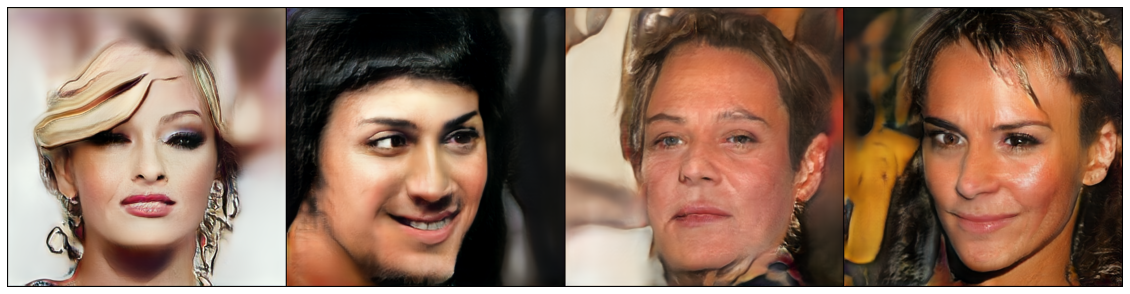

In [ ]:
num_images = 4

# convenientemente, esse modelo já nos fornece um método para gerar o ruído z
# com as dimensões adequadas para esse modelo
noise, _ = model.buildNoiseData(num_images)

# geramos a imagem usando o ruído amostrado
with torch.no_grad():
    generated_images = model.test(noise)

# construindo uma imagem com um "grid" com todas as 64, trocas os canais para a ultima
# dimensão e transfere os dados para a cpu num objeto numpy
grid = torchvision.utils.make_grid(generated_images.clamp(min=-1, max=1), scale_each=True, normalize=True).permute(1, 2, 0).cpu().numpy()

# mostrando a imagem
plt.subplots(figsize=(20, 6))
plt.imshow(grid)
plt.axis('off')
plt.show();

In [ ]:
model.netG

GNet(
  (scaleLayers): ModuleList(
    (0): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (1): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (2): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1): EqualizedConv2d(
        (module): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
    )
    (3): ModuleList(
      (0): EqualizedConv2d(
        (module): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      )
      (1)